In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.datasets import mnist
import random

In [2]:
(X_train,y_train), (X_test,y_test)=mnist.load_data()
X_train.shape
X_test.shape

(10000, 28, 28)

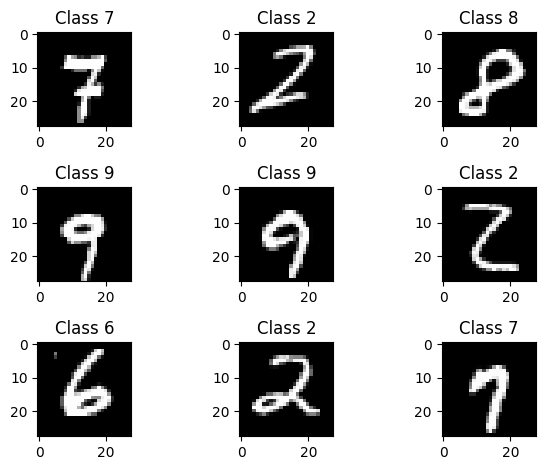

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title(f"Class {y_train[num]}")
    
plt.tight_layout()

In [4]:
X_train_reshaped=X_train.reshape(60000, 784)
X_test_reshaped=X_test.reshape(10000, 784)
X_train_reshaped=X_train_reshaped.astype("float32")
X_test_reshaped=X_test_reshaped.astype("float32")

X_train_reshaped/=255
X_test_reshaped/=255
X_train_reshaped[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [5]:
model=Sequential([
    Dense(units=512,activation='relu'),
    Dense(units=512,activation='relu'),
    Dense(units=10,activation='softmax')
    
])

In [6]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),metrics=['mae', 'acc'])

In [7]:
model.fit(X_train_reshaped,y_train,epochs=10, validation_data = (X_test_reshaped,y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1934 - mae: 4.3737 - acc: 0.9424 - val_loss: 0.1264 - val_mae: 4.3630 - val_acc: 0.9649
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1002 - mae: 4.3737 - acc: 0.9737 - val_loss: 0.1310 - val_mae: 4.3630 - val_acc: 0.9663
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0827 - mae: 4.3737 - acc: 0.9804 - val_loss: 0.1536 - val_mae: 4.3630 - val_acc: 0.9657
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0726 - mae: 4.3737 - acc: 0.9836 - val_loss: 0.1202 - val_mae: 4.3630 - val_acc: 0.9771
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0635 - mae: 4.3737 - acc: 0.9858 - val_loss: 0.1217 - val_mae: 4.3630 - val_acc: 0.9813
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0573 - mae: 4.3737 - acc: 0.9881 - val_loss: 0.1416 - val_mae: 4.3630 - val_acc: 0.9779
Epoc

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
score=model.evaluate(X_test_reshaped,y_test)
print(score)

313/313 [==============================] - 0s 761us/step - loss: 0.2396 - mae: 4.3630 - acc: 0.9791
[0.23964057862758636, 4.3629984855651855, 0.9790999889373779]


In [26]:
import cv2
image_files = pd.DataFrame(columns=range(784)).add_prefix('pixels_')
## provide image here
r_image = cv2.imread("image.png") 
numpy_image = cv2.cvtColor(r_image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(numpy_image, (28, 28)).astype(np.float32)
image = image.reshape(-1)
image_files.loc[f'image_{i}', 'pixels_0':] = image
print(image_files.head())

[ WARN:0@475.634] global loadsave.cpp:248 findDecoder imread_('image.png'): can't open/read file: check file path/integrity


error: OpenCV(4.8.0) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [27]:
image=image.reshape(1,784)

In [22]:
pred= model.predict(image)

1/1 [==============================] - 0s 13ms/step


In [23]:
pred

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
pred_p=tf.nn.softmax(pred)
pred_p
np.sum(pred_p)
print(f"The predicted digit is {np.argmax(pred_p)}")

The predicted digit is 2


1/1 [==============================] - 0s 8ms/step


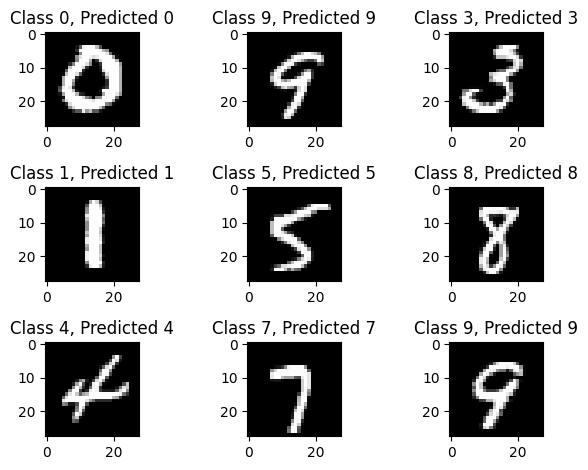

In [18]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    pred_num=model.predict(X_train_reshaped[num].reshape(1,784))
    pred_num_p=tf.nn.softmax(pred_num)
    
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title(f"Class {y_train[num]}, Predicted {np.argmax(pred_num_p)}")
    
plt.tight_layout()